# Josh's LRIS Spectroscopy Focus Playground

In [1]:
from glob import glob
from astropy.io import fits
from astropy.modeling import models, fitting
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
def focus(bfoc, red=False):
    sharpness = []
    focus = []
    for i,file in enumerate(bfoc):
        with fits.open(file) as hdul:
            if red == False:
                focus.append(hdul[0].header.get("BLUFOCUS"))
            else:
                focus.append(hdul[0].header.get("REDFOCUS"))
#             var = [np.var(hdu.data) for hdu in hdul[1:]]
            var = [np.var(np.mean(hdu.data, axis=1)) for hdu in hdul[1:]]
            sharpness.append(var)

    sharpness = np.mean(sharpness, axis=1)
    
    imaxbv = np.where(sharpness == max(sharpness))[0][0]
    start = max([0,imaxbv-1])
    stop = min([5,imaxbv+2])
#     if bvariance[stop] > bvariance[start-1]:
#         stop += 1
#     else:
#         start -= 1

    plt.plot(focus, sharpness, 'bo', alpha=0.4)
    plt.plot(focus[start:stop+1], sharpness[start:stop+1], 'bo', label='Sharpness')
    yspan = max(sharpness) - min(sharpness)
    plt.ylim(min(sharpness)-0.1*yspan, max(sharpness)+0.1*yspan)
    plt.xlabel('Focus')
    plt.ylabel('Sharpness')

    try:
        p0 = models.Polynomial1D(2)
        fitter = fitting.LinearLSQFitter()
        p = fitter(p0, focus[start:stop+1], sharpness[start:stop+1])
        if p.c2 > 0:
            raise TypeError
        x = np.linspace(min(focus), max(focus), 20)
        y = p(x)
        vertex = -p.c1/(2*p.c2)
        plt.plot(x, y, 'g-', label='Fit')
        plt.vlines(vertex, min(sharpness)-0.1*yspan, max(sharpness)+0.1*yspan, color='r', alpha=0.3,
                   label=f"Best Focus = {vertex:.0f}")
        plt.legend(loc='best')
        plt.show()
        return vertex
    except:
        print('Failed to fit focus value')
        plt.show()
        return None

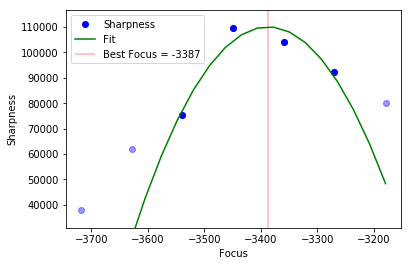

-3386.9464339733031

In [3]:
bfoc = glob('test_images/bfoc*')
focus(bfoc)

Failed to fit focus value


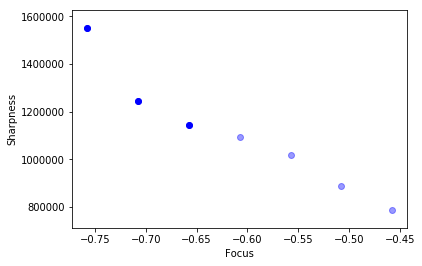

In [4]:
rfoc = glob('test_images/rfoc*')
focus(rfoc, red=True)

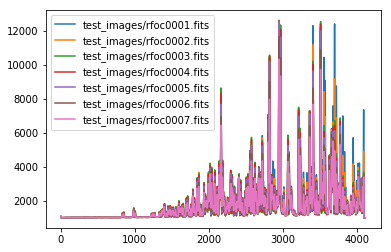

In [5]:
for file in rfoc:
    with fits.open(file) as hdul:
        trace = np.mean(hdul[4].data, axis=1)
        plt.plot(trace, label=file)
# plt.xlim(3140,3190)
# plt.xlim(2920,2970)
# plt.xlim(2980,3030)
# plt.xlim(2930,3000)
plt.legend(loc='best')
plt.show()

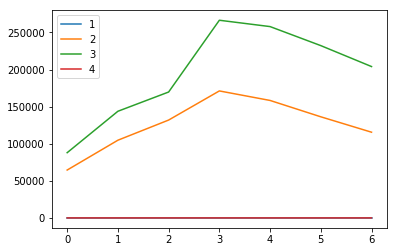

In [6]:
variance = [[], [], [], []]
for file in bfoc:
    with fits.open(file) as hdul:
        for i,hdu in enumerate(hdul[1:]):
            variance[i].append(np.var(np.mean(hdu.data, axis=1)))
plt.plot(variance[0], label='1')
plt.plot(variance[1], label='2')
plt.plot(variance[2], label='3')
plt.plot(variance[3], label='4')
plt.legend(loc='best')
plt.show()

# Imaging Focus

In [7]:
imbfoc = glob('test_images/im_bfoc*')

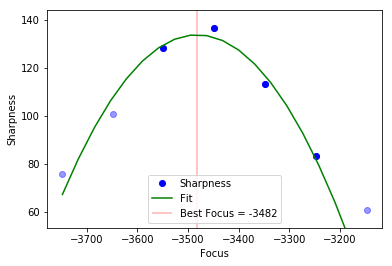

-3482.1000533453439

In [8]:
focus(imbfoc)